<a href="https://colab.research.google.com/github/tejasvipver/Data-Science-project/blob/main/DS/stock_market_prediction_using_google_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

stock Market prediction helps to determine  the future value of a company stock and other financial instruments traded on an exchange.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

https://www.kaggle.com/datasets/rahulsah06/gooogle-stock-price

Have 2 dataet train and test separately

In [4]:
google_data = pd.read_csv("/content/Google_train_data.csv")
google_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
google_data.info()     # info give the datatypes info and non null values info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [9]:
google_data.describe(include='all')

,Date,Open,High,Low,Close,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258,1258
unique,1258,NaN,NaN,NaN,1241,1240
top,1/3/2012,NaN,NaN,NaN,718.81,"3,686,400"
freq,1,NaN,NaN,NaN,2,2
mean,NaN,533.709833,537.880223,529.007409,NaN,NaN
std,NaN,151.904442,153.008811,150.552807,NaN,NaN
min,NaN,279.120000,281.210000,277.220000,NaN,NaN
25%,NaN,404.115000,406.765000,401.765000,NaN,NaN
50%,NaN,537.470000,540.750000,532.990000,NaN,NaN
75%,NaN,654.922500,662.587500,644.800000,NaN,NaN


In [10]:
google_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [12]:
google_data.shape

(1258, 6)

In [17]:
google_data["Close"]=pd.to_numeric(google_data.Close,errors='coerce')    # to convert the close object to float
google_data = google_data.dropna()     # to drop the missing values
trainData = google_data.iloc[:,4:5].values     # to consider only closing col as my training data
trainData

array([[663.59],
       [666.45],
       [657.21],
       ...,
       [785.05],
       [782.79],
       [771.82]])

In [18]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [19]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [20]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

LSTM are a type of Recurrent Neural network for learning long term dependencies. It is commonly used for processing and predicting on the basis of time-series data. They have chain like structure having 4 interactive layers.



The input for an LSTM network will be a 3d Tensor. So it will have a sequence_length, timestep, batch_size

In [21]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 9s - 266ms/step - loss: 0.0290
Epoch 2/20
35/35 - 4s - 103ms/step - loss: 0.0123
Epoch 3/20
35/35 - 5s - 145ms/step - loss: 0.0090
Epoch 4/20
35/35 - 5s - 152ms/step - loss: 0.0094
Epoch 5/20
35/35 - 4s - 103ms/step - loss: 0.0069
Epoch 6/20
35/35 - 7s - 191ms/step - loss: 0.0080
Epoch 7/20
35/35 - 9s - 247ms/step - loss: 0.0077
Epoch 8/20
35/35 - 5s - 146ms/step - loss: 0.0064
Epoch 9/20
35/35 - 4s - 102ms/step - loss: 0.0063
Epoch 10/20
35/35 - 6s - 168ms/step - loss: 0.0057
Epoch 11/20
35/35 - 4s - 123ms/step - loss: 0.0057
Epoch 12/20
35/35 - 7s - 202ms/step - loss: 0.0053
Epoch 13/20
35/35 - 8s - 236ms/step - loss: 0.0046
Epoch 14/20
35/35 - 4s - 123ms/step - loss: 0.0050
Epoch 15/20
35/35 - 4s - 126ms/step - loss: 0.0051
Epoch 16/20
35/35 - 4s - 102ms/step - loss: 0.0050
Epoch 17/20
35/35 - 6s - 161ms/step - loss: 0.0043
Epoch 18/20
35/35 - 5s - 130ms/step - loss: 0.0047
Epoch 19/20
35/35 - 6s - 166ms/step - loss: 0.0045
Epoch 20/20
35/35 - 4s - 102ms/step - lo

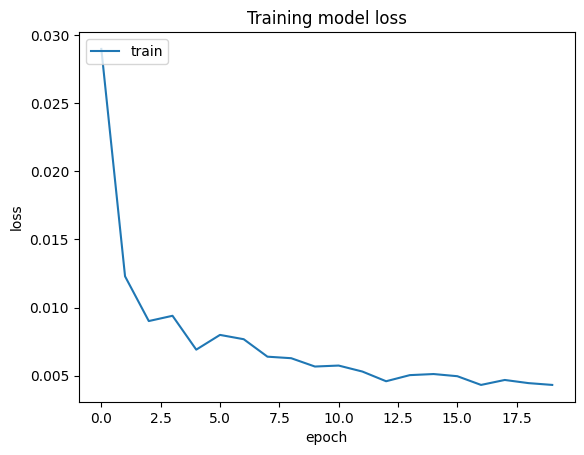

In [23]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# loss is been declined steeply

In [24]:
testData = pd.read_csv('/content/Google_train_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1089, 60, 1)

In [25]:
y_pred = model.predict(X_test)
y_pred

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step


array([[0.35714644],
       [0.3618231 ],
       [0.36288953],
       ...,
       [0.70410657],
       [0.7003732 ],
       [0.69572926]], dtype=float32)

In [26]:
predicted_price = sc.inverse_transform(y_pred)

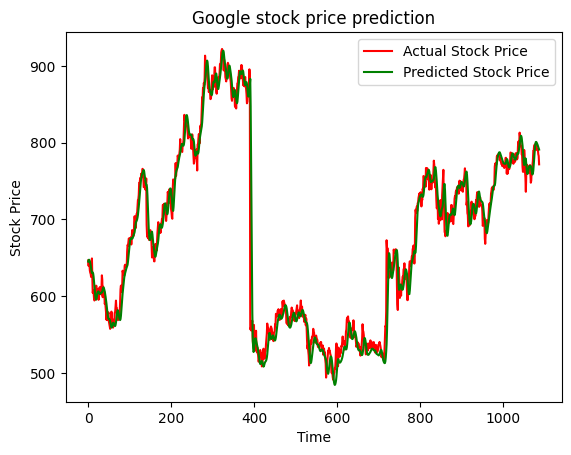

In [27]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()